In [ ]:
import pyspark

In [5]:
# start spark sessnon and configureation
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession, SQLContext
spark = SparkSession.builder.master("local[2]").appName("dat").getOrCreate()
sc = spark.sparkContext
#create an instance of SQLContext
sqlContext = SQLContext(spark)

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/05/01 18:57:33 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
/usr/local/lib/python3.11/dist-packages/pyspark/sql/context.py:113: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [6]:
from io import StringIO
from collections import namedtuple
from pyspark.sql import Row
from pyspark.sql.types import *
from pyspark.sql.functions import *

import csv
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

In [7]:
EV_Countries = pd.read_csv('/kaggle/input/av-adopted-countries-dataset/AV Adopted Countries Dataset.csv')

In [8]:
#West African Countries to be predicted

EV_African_Countries = pd.read_csv('/kaggle/input/ev-west-african-countries-dataset/EV_West_African_Countries_Data.csv')

**TRANSFORM DATASET**

In [9]:
EV_Countries

,Country,GDP_per_Capita_USD,Inflation_Rate_percent,Population_millions,Urbanization_Rate_percent,Unemployment_Rate_percent,Electricity_Access_percent,Renewable_Share_percent,EV_Charging_Stations,Fuel_Price_USD_per_litre,EV_Policy_Exists,Tax_Incentives,EV_Public_Awareness_Score,Social_Media_Sentiment,ICT_Readiness_Index,Total Vehicles est.,Registered EVs est.,EV Penetration (%)
0,Norway,89000,3.5,5.4,82.4,3.1,100,98.0,20000,2.2,yes,yes,9.5,0.9,90.2,3000000,630000,21.0
1,Germany,51500,4.2,83.2,77.5,5.7,100,42.5,75000,2.0,yes,yes,8.7,0.7,86.3,50000000,3100000,6.2
2,France,47000,3.8,65.3,81.0,7.1,100,23.8,45000,2.0,yes,yes,8.0,0.6,84.5,38000000,1824000,4.8
3,UK,46000,3.9,67.3,84.5,4.2,100,45.2,48000,2.1,yes,yes,8.2,0.6,88.1,40000000,2360000,5.9
4,Netherlands,58000,4.0,17.7,91.1,3.5,100,55.0,90000,2.3,yes,yes,9.3,0.8,89.7,9000000,945000,10.5
5,Sweden,55000,3.2,10.4,88.2,4.0,100,66.5,30000,2.3,yes,yes,8.8,0.7,87.2,6000000,498000,8.3
6,USA,70000,3.7,331.9,83.6,3.8,100,20.0,150000,1.2,yes,yes,7.5,0.5,91.0,278000000,9452000,3.4
7,Canada,60000,3.5,39.5,81.3,5.1,100,23.5,20000,1.4,yes,yes,7.8,0.6,89.0,26000000,806000,3.1
8,Japan,43000,2.8,125.8,92.0,2.6,100,19.2,32000,1.4,yes,yes,8.1,0.5,85.4,80000000,2080000,2.6
9,South Korea,35000,3.0,52.0,81.4,3.2,100,16.3,28000,1.6,yes,yes,7.9,0.4,84.1,24000000,672000,2.8


In [10]:
EV_African_Countries

,Country,GDP_per_Capita_USD,Inflation_Rate_percent,Population_millions,Urbanization_Rate_percent,Unemployment_Rate_percent,Electricity_Access_percent,Renewable_Share_percent,EV_Charging_Stations,Fuel_Price_USD_per_litre,EV_Policy_Exists,Tax_Incentives,EV_Public_Awareness_Score,Social_Media_Sentiment,ICT_Readiness_Index,Total Vehicles est.,Registered EVs est.,EV Penetration (%)
0,Nigeria,2400,18.1,223.8,53.2,33.3,55.4,13.2,15,1.20,yes,yes,6.5,1.4,54.3,12000000,1200,0.01
1,Ghana,2250,23.5,34.1,58.0,13.9,86.6,24.5,8,1.10,yes,yes,7.0,1.7,62.7,1200000,600,0.05
2,Senegal,1550,9.2,18.4,49.1,17.5,70.3,22.8,4,1.30,no,no,4.0,1.1,49.5,750000,300,0.04
3,Ivory Coast,1800,6.3,27.5,51.3,10.4,76.5,20.1,5,1.25,no,no,4.5,1.0,51.0,900000,270,0.03
4,Benin,1450,5.1,13.5,48.5,12.2,65.1,18.3,3,1.15,no,no,3.8,0.9,46.2,480000,48,0.01
5,Togo,1700,7.2,8.6,42.7,11.8,70.0,19.4,2,1.18,yes,yes,5.0,1.3,50.3,500000,100,0.02
6,Burkina Faso,1350,10.5,22.1,31.2,18.3,50.5,16.5,1,1.22,no,no,3.5,0.8,45.1,420000,42,0.01
7,Mali,1200,12.7,21.9,44.6,20.0,47.0,14.1,0,1.19,no,no,2.9,0.7,40.0,400000,40,0.01
8,Niger,1100,15.3,26.2,20.3,22.4,41.2,12.3,0,1.28,no,no,2.5,0.6,38.7,300000,0,0.00
9,Guinea,1300,11.1,14.0,38.1,19.1,53.0,13.0,1,1.24,yes,yes,4.8,1.2,44.5,360000,36,0.01


In [11]:
print(EV_Countries.shape)
print(EV_Countries.info())

(39, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     39 non-null     object 
 1   GDP_per_Capita_USD          39 non-null     int64  
 2   Inflation_Rate_percent      39 non-null     float64
 3   Population_millions         39 non-null     float64
 4   Urbanization_Rate_percent   39 non-null     float64
 5   Unemployment_Rate_percent   39 non-null     float64
 6   Electricity_Access_percent  39 non-null     int64  
 7   Renewable_Share_percent     39 non-null     float64
 8   EV_Charging_Stations        39 non-null     int64  
 9   Fuel_Price_USD_per_litre    39 non-null     float64
 10  EV_Policy_Exists            39 non-null     object 
 11  Tax_Incentives              39 non-null     object 
 12  EV_Public_Awareness_Score   39 non-null     float64
 13  Social_Media_Sentiment      

In [12]:
print(EV_African_Countries.shape)
print(EV_African_Countries.info())

(15, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     15 non-null     object 
 1   GDP_per_Capita_USD          15 non-null     int64  
 2   Inflation_Rate_percent      15 non-null     float64
 3   Population_millions         15 non-null     float64
 4   Urbanization_Rate_percent   15 non-null     float64
 5   Unemployment_Rate_percent   15 non-null     float64
 6   Electricity_Access_percent  15 non-null     float64
 7   Renewable_Share_percent     15 non-null     float64
 8   EV_Charging_Stations        15 non-null     int64  
 9   Fuel_Price_USD_per_litre    15 non-null     float64
 10  EV_Policy_Exists            15 non-null     object 
 11  Tax_Incentives              15 non-null     object 
 12  EV_Public_Awareness_Score   15 non-null     float64
 13  Social_Media_Sentiment      

In [13]:
# Convert binary categorical values
EV_Countries['EV_Policy_Exists'] = EV_Countries['EV_Policy_Exists'].map({'yes': 1.0, 'no': 0.0})
EV_Countries['Tax_Incentives'] = EV_Countries['Tax_Incentives'].map({'yes': 1.0, 'no': 0.0})

In [14]:
# Convert binary categorical values
EV_Countries['EV_Policy_Exists'] = EV_Countries['EV_Policy_Exists'].map({'yes': 1.0, 'no': 0.0})
EV_Countries['Tax_Incentives'] = EV_Countries['Tax_Incentives'].map({'yes': 1.0, 'no': 0.0})

In [15]:
print(EV_Countries.shape)
print(EV_Countries.info())

(39, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     39 non-null     object 
 1   GDP_per_Capita_USD          39 non-null     int64  
 2   Inflation_Rate_percent      39 non-null     float64
 3   Population_millions         39 non-null     float64
 4   Urbanization_Rate_percent   39 non-null     float64
 5   Unemployment_Rate_percent   39 non-null     float64
 6   Electricity_Access_percent  39 non-null     int64  
 7   Renewable_Share_percent     39 non-null     float64
 8   EV_Charging_Stations        39 non-null     int64  
 9   Fuel_Price_USD_per_litre    39 non-null     float64
 10  EV_Policy_Exists            0 non-null      float64
 11  Tax_Incentives              0 non-null      float64
 12  EV_Public_Awareness_Score   39 non-null     float64
 13  Social_Media_Sentiment      

In [16]:
print(EV_African_Countries.shape)
print(EV_African_Countries.info())

(15, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     15 non-null     object 
 1   GDP_per_Capita_USD          15 non-null     int64  
 2   Inflation_Rate_percent      15 non-null     float64
 3   Population_millions         15 non-null     float64
 4   Urbanization_Rate_percent   15 non-null     float64
 5   Unemployment_Rate_percent   15 non-null     float64
 6   Electricity_Access_percent  15 non-null     float64
 7   Renewable_Share_percent     15 non-null     float64
 8   EV_Charging_Stations        15 non-null     int64  
 9   Fuel_Price_USD_per_litre    15 non-null     float64
 10  EV_Policy_Exists            15 non-null     object 
 11  Tax_Incentives              15 non-null     object 
 12  EV_Public_Awareness_Score   15 non-null     float64
 13  Social_Media_Sentiment      

**VISUALISE THE DATA SET**

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


<Axes: >

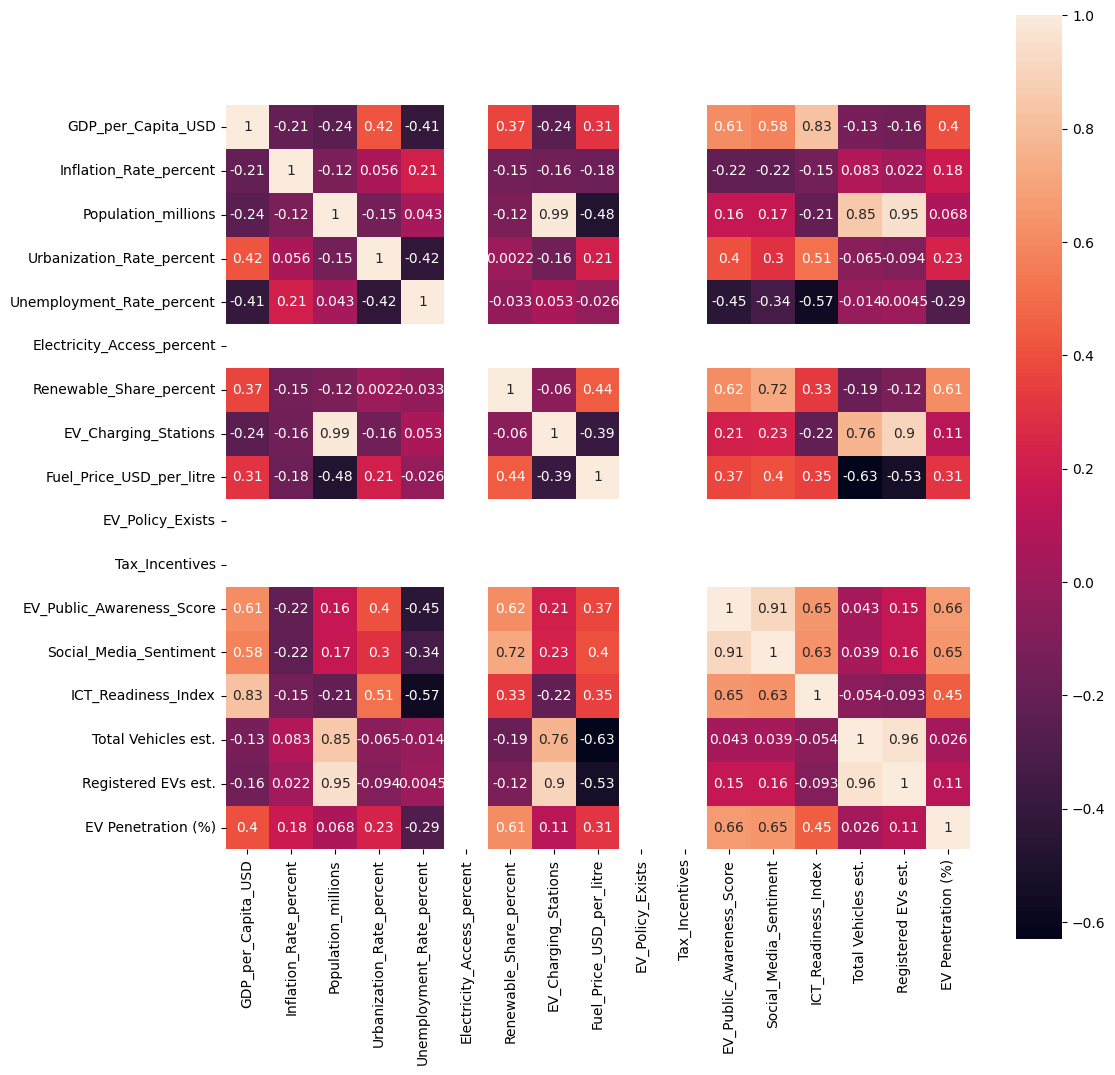

In [17]:
# Figure to see the correlation between features

import seaborn as sns

fig = plt.figure(figsize=(12,12))
Numerical_EV_Countries = EV_Countries.select_dtypes(include=np.number)  # select only numerical columns
sns.heatmap(Numerical_EV_Countries.corr(), vmax=1, square=True, annot=True)

#Brief idea about the correlation between features

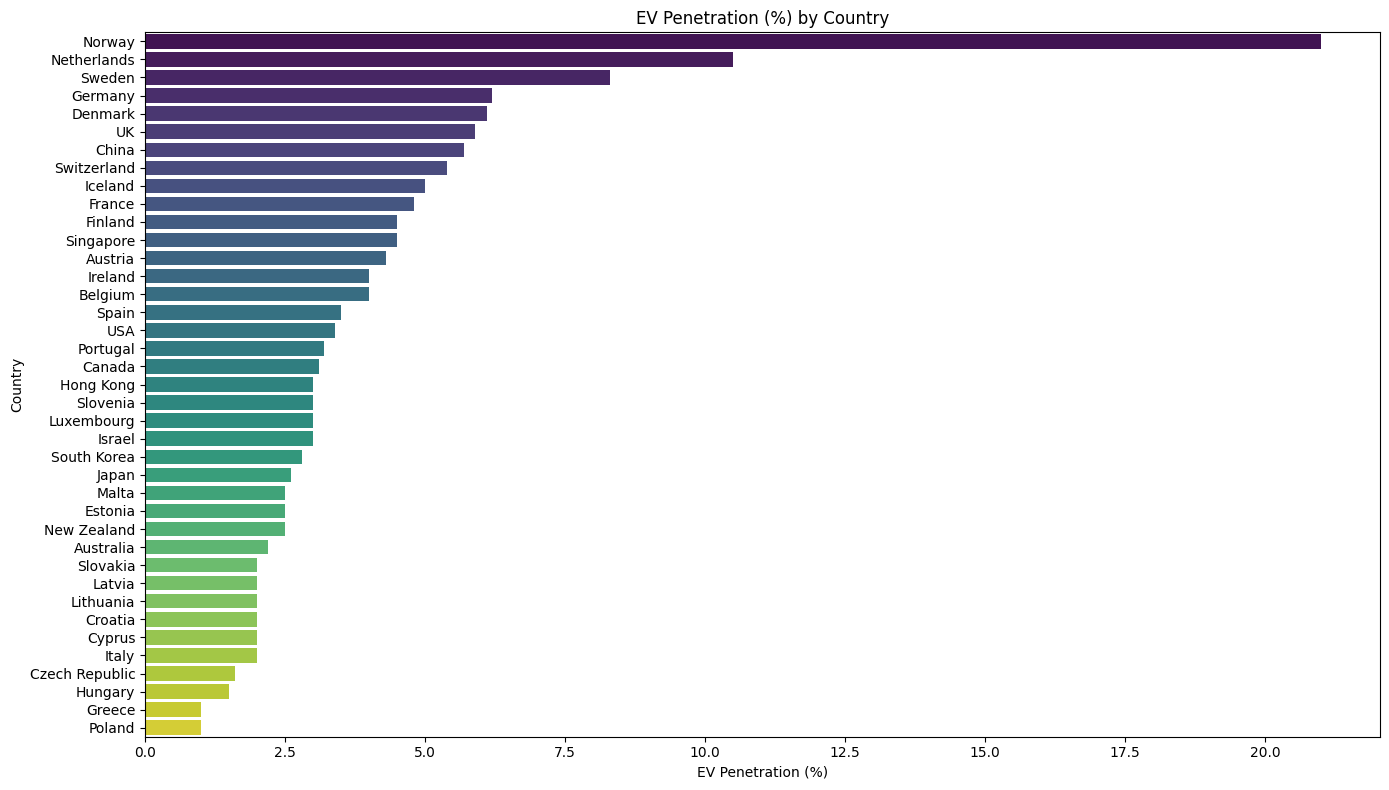

In [18]:
# Sort data by EV Penetration (%)
EV_Countries_sorted = EV_Countries.sort_values('EV Penetration (%)', ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(data=EV_Countries_sorted, x='EV Penetration (%)', y='Country', palette='viridis')

plt.title('EV Penetration (%) by Country')
plt.xlabel('EV Penetration (%)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

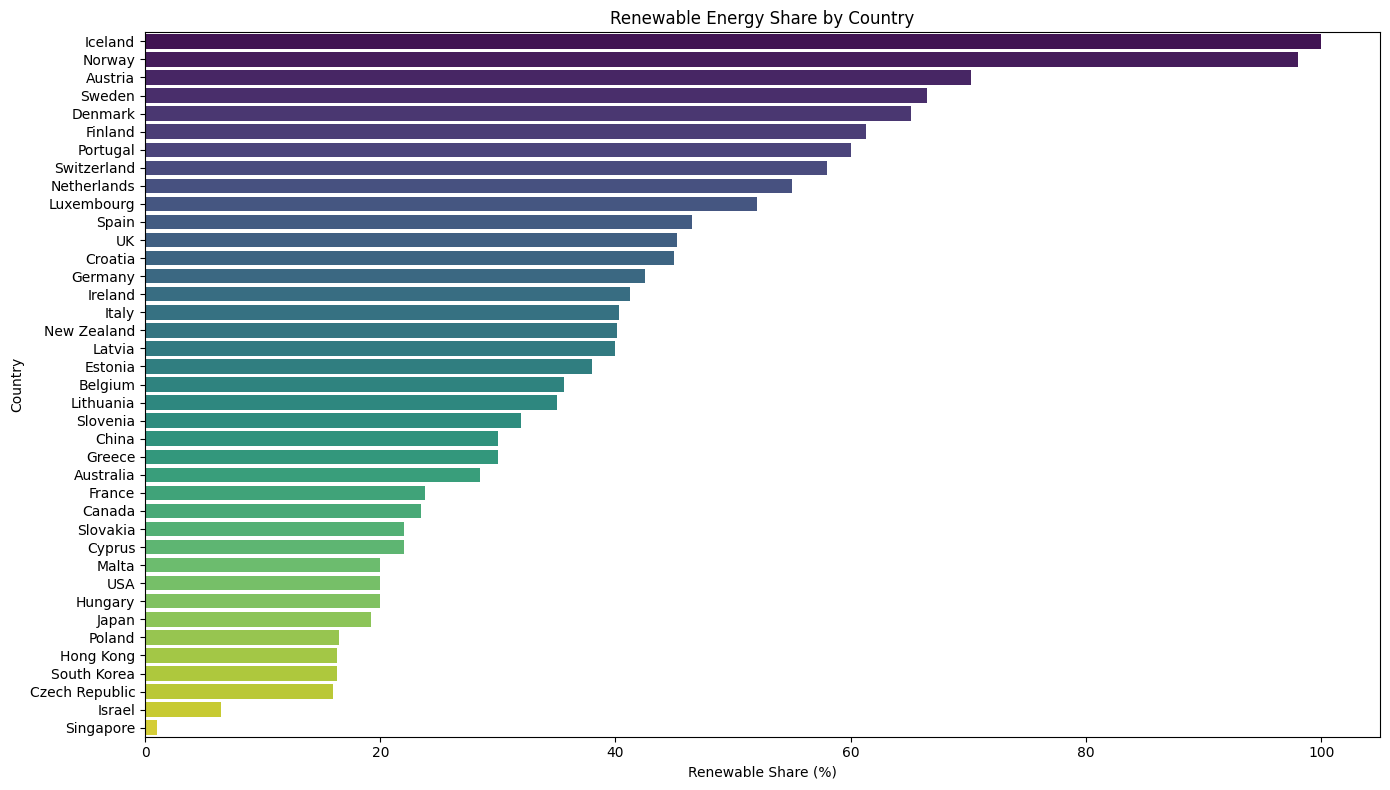

In [19]:
# Sort data by Renewable Energy Share
EV_Countries_sorted = EV_Countries.sort_values('Renewable_Share_percent', ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(data=EV_Countries_sorted, x='Renewable_Share_percent', y='Country', palette='viridis')

plt.title('Renewable Energy Share by Country')
plt.xlabel('Renewable Share (%)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

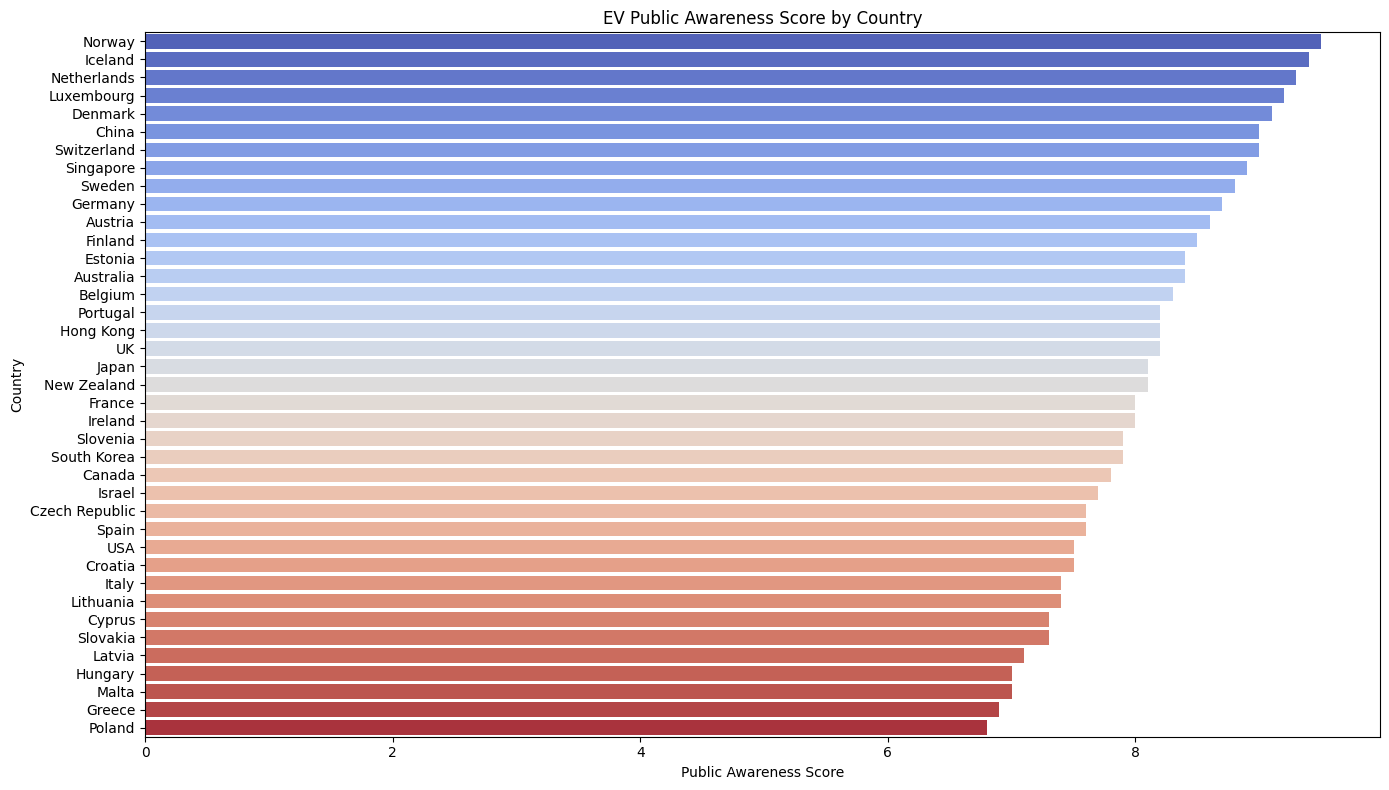

In [20]:
# Sort countries by awareness score (descending)
EV_Countries_sorted = EV_Countries.sort_values('EV_Public_Awareness_Score', ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(data=EV_Countries_sorted, x='EV_Public_Awareness_Score', y='Country', palette='coolwarm')

plt.title('EV Public Awareness Score by Country')
plt.xlabel('Public Awareness Score')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

In [21]:
EV_Countries.loc[EV_Countries['EV_Public_Awareness_Score'].idxmax(), 'Country']

'Norway'

**FEATURE EXTRACTION AND PREPROCESSING**

In [22]:
#Creating new category column to classify the target variable into low medium and low

bins = [0, 1, 5, np.inf]
labels = ['Low', 'Medium', 'High']

# Create new category column
EV_Countries['Penetration_Category'] = pd.cut(EV_Countries['EV Penetration (%)'], bins=bins, labels=labels, right=False)

# Display the result
print(EV_Countries[['EV Penetration (%)', 'Penetration_Category']])

    EV Penetration (%) Penetration_Category
0                 21.0                 High
1                  6.2                 High
2                  4.8               Medium
3                  5.9                 High
4                 10.5                 High
5                  8.3                 High
6                  3.4               Medium
7                  3.1               Medium
8                  2.6               Medium
9                  2.8               Medium
10                 5.7                 High
11                 2.2               Medium
12                 4.5               Medium
13                 5.4                 High
14                 6.1                 High
15                 4.0               Medium
16                 4.3               Medium
17                 2.0               Medium
18                 3.5               Medium
19                 3.2               Medium
20                 4.0               Medium
21                 2.5          

In [23]:
#Converting the new column 'Penetration_Category' data using the rule: High 2, Medium 1, Low 0
#This is because models require numeric targets to perform learning operations

EV_Countries['Penetration_Category'] = EV_Countries['Penetration_Category'].map( {'High':2,'Medium':1,'Low':0} )

In [24]:
#Creating new category column to classify the target variable into low medium and low

bins = [0, 1, 5, np.inf]
labels = ['Low', 'Medium', 'High']

# Create new category column
EV_African_Countries['Penetration_Category'] = pd.cut(EV_African_Countries['EV Penetration (%)'], bins=bins, labels=labels, right=False)

# Display the result
print(EV_African_Countries[['EV Penetration (%)', 'Penetration_Category']])

    EV Penetration (%) Penetration_Category
0                 0.01                  Low
1                 0.05                  Low
2                 0.04                  Low
3                 0.03                  Low
4                 0.01                  Low
5                 0.02                  Low
6                 0.01                  Low
7                 0.01                  Low
8                 0.00                  Low
9                 0.01                  Low
10                0.01                  Low
11                0.00                  Low
12                0.02                  Low
13                0.05                  Low
14                0.00                  Low


In [25]:
#Converting the new column 'Penetration_Category' data using the rule: High 2, Medium 1, Low 0
#This is because models require numeric targets to perform learning operations

EV_African_Countries['Penetration_Category'] = EV_African_Countries['Penetration_Category'].map( {'High':2,'Medium':1,'Low':0} )

In [26]:
#Drop Country because it is an identifier (name), not useful for prediction
#Drop EV Penetration (%), better to predict with Penetration_Category

New_EV_Countries= EV_Countries.drop(columns=['Country', 'EV Penetration (%)'])

In [27]:
#Drop Country in the  because it is an identifier (name), not useful for prediction

New_EV_African_Countries= EV_African_Countries.drop(columns=['Country', 'EV Penetration (%)'])

In [28]:
New_EV_Countries = New_EV_Countries.rename(columns={
    'Total Vehicles est.': 'Total_Vehicles_est',
    'Registered EVs est.': 'Registered_EVs_est',
    'EV Policy Exists': 'EV_Policy_Exists',
    'Tax Incentives': 'Tax_Incentives',
    'EV Public Awareness Score': 'EV_Public_Awareness_Score',
    'Social Media Sentiment': 'Social_Media_Sentiment',
    'ICT Readiness Index': 'ICT_Readiness_Index'
})

New_EV_Countries

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,GDP_per_Capita_USD,Inflation_Rate_percent,Population_millions,Urbanization_Rate_percent,Unemployment_Rate_percent,Electricity_Access_percent,Renewable_Share_percent,EV_Charging_Stations,Fuel_Price_USD_per_litre,EV_Policy_Exists,Tax_Incentives,EV_Public_Awareness_Score,Social_Media_Sentiment,ICT_Readiness_Index,Total_Vehicles_est,Registered_EVs_est,Penetration_Category
0,89000,3.5,5.4,82.4,3.1,100,98.0,20000,2.2,NaN,NaN,9.5,0.9,90.2,3000000,630000,2
1,51500,4.2,83.2,77.5,5.7,100,42.5,75000,2.0,NaN,NaN,8.7,0.7,86.3,50000000,3100000,2
2,47000,3.8,65.3,81.0,7.1,100,23.8,45000,2.0,NaN,NaN,8.0,0.6,84.5,38000000,1824000,1
3,46000,3.9,67.3,84.5,4.2,100,45.2,48000,2.1,NaN,NaN,8.2,0.6,88.1,40000000,2360000,2
4,58000,4.0,17.7,91.1,3.5,100,55.0,90000,2.3,NaN,NaN,9.3,0.8,89.7,9000000,945000,2
5,55000,3.2,10.4,88.2,4.0,100,66.5,30000,2.3,NaN,NaN,8.8,0.7,87.2,6000000,498000,2
6,70000,3.7,331.9,83.6,3.8,100,20.0,150000,1.2,NaN,NaN,7.5,0.5,91.0,278000000,9452000,1
7,60000,3.5,39.5,81.3,5.1,100,23.5,20000,1.4,NaN,NaN,7.8,0.6,89.0,26000000,806000,1
8,43000,2.8,125.8,92.0,2.6,100,19.2,32000,1.4,NaN,NaN,8.1,0.5,85.4,80000000,2080000,1
9,35000,3.0,52.0,81.4,3.2,100,16.3,28000,1.6,NaN,NaN,7.9,0.4,84.1,24000000,672000,1


In [29]:
New_EV_African_Countries = New_EV_African_Countries.rename(columns={
    'Total Vehicles est.': 'Total_Vehicles_est',
    'Registered EVs est.': 'Registered_EVs_est',
    'EV Policy Exists': 'EV_Policy_Exists',
    'Tax Incentives': 'Tax_Incentives',
    'EV Public Awareness Score': 'EV_Public_Awareness_Score',
    'Social Media Sentiment': 'Social_Media_Sentiment',
    'ICT Readiness Index': 'ICT_Readiness_Index'
})

New_EV_African_Countries

,GDP_per_Capita_USD,Inflation_Rate_percent,Population_millions,Urbanization_Rate_percent,Unemployment_Rate_percent,Electricity_Access_percent,Renewable_Share_percent,EV_Charging_Stations,Fuel_Price_USD_per_litre,EV_Policy_Exists,Tax_Incentives,EV_Public_Awareness_Score,Social_Media_Sentiment,ICT_Readiness_Index,Total_Vehicles_est,Registered_EVs_est,Penetration_Category
0,2400,18.1,223.8,53.2,33.3,55.4,13.2,15,1.20,yes,yes,6.5,1.4,54.3,12000000,1200,0
1,2250,23.5,34.1,58.0,13.9,86.6,24.5,8,1.10,yes,yes,7.0,1.7,62.7,1200000,600,0
2,1550,9.2,18.4,49.1,17.5,70.3,22.8,4,1.30,no,no,4.0,1.1,49.5,750000,300,0
3,1800,6.3,27.5,51.3,10.4,76.5,20.1,5,1.25,no,no,4.5,1.0,51.0,900000,270,0
4,1450,5.1,13.5,48.5,12.2,65.1,18.3,3,1.15,no,no,3.8,0.9,46.2,480000,48,0
5,1700,7.2,8.6,42.7,11.8,70.0,19.4,2,1.18,yes,yes,5.0,1.3,50.3,500000,100,0
6,1350,10.5,22.1,31.2,18.3,50.5,16.5,1,1.22,no,no,3.5,0.8,45.1,420000,42,0
7,1200,12.7,21.9,44.6,20.0,47.0,14.1,0,1.19,no,no,2.9,0.7,40.0,400000,40,0
8,1100,15.3,26.2,20.3,22.4,41.2,12.3,0,1.28,no,no,2.5,0.6,38.7,300000,0,0
9,1300,11.1,14.0,38.1,19.1,53.0,13.0,1,1.24,yes,yes,4.8,1.2,44.5,360000,36,0


In [30]:
# import libraries
from pyspark.ml.feature import Tokenizer,StopWordsRemover, CountVectorizer,IDF,StringIndexer
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.linalg import Vector
from pyspark.ml import Pipeline

In [31]:
# Define stages of the pipeline
# Index target column (Penetration_Category)

label_indexer = StringIndexer(inputCol="Penetration_Category", outputCol="label")

#Choosing features

feature_cols = [
    "GDP_per_Capita_USD",
    "Inflation_Rate_percent",
    "Population_millions",
    "Urbanization_Rate_percent",
    "Unemployment_Rate_percent",
    "Electricity_Access_percent",
    "Renewable_Share_percent",
    "EV_Charging_Stations",
    "Fuel_Price_USD_per_litre",
    "EV_Policy_Exists",
    "Tax_Incentives",
    "EV_Public_Awareness_Score",
    "Social_Media_Sentiment",
    "ICT_Readiness_Index",
    "Total_Vehicles_est",
    "Registered_EVs_est"
]

#Assemble the feature vector
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")

# Build the pipeline with all stages
EV_Countries_data_prep_pipe = Pipeline(stages=[label_indexer, assembler])

In [32]:
# Index target column (Penetration_Category)

label_indexer = StringIndexer(inputCol="Penetration_Category", outputCol="label")

#Choosing features
feature_cols = [
    "GDP_per_Capita_USD",
    "Inflation_Rate_percent",
    "Population_millions",
    "Urbanization_Rate_percent",
    "Unemployment_Rate_percent",
    "Electricity_Access_percent",
    "Renewable_Share_percent",
    "EV_Charging_Stations",
    "Fuel_Price_USD_per_litre",
    "EV_Policy_Exists",
    "Tax_Incentives",
    "EV_Public_Awareness_Score",
    "Social_Media_Sentiment",
    "ICT_Readiness_Index",
    "Total_Vehicles_est",
    "Registered_EVs_est"
]

#Assemble the feature vector
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")

# Build the pipeline with all stages
EV_African_Countries_data_prep_pipe = Pipeline(stages=[label_indexer, assembler])

In [33]:
print(type(New_EV_Countries))

<class 'pandas.core.frame.DataFrame'>


In [34]:
print(type(New_EV_African_Countries))

<class 'pandas.core.frame.DataFrame'>


In [35]:
#Convert New_EV_Countries Data from pandas to pyspark

from pyspark.sql import types as T

# Define a schema for the PySpark DataFrame if necessary
schema = T.StructType([
    T.StructField("GDP_per_Capita_USD",T.IntegerType(), True),
    T.StructField("Inflation_Rate_percent", T.FloatType(), True),
    T.StructField("Population_millions", T.FloatType(), True),
    T.StructField("Urbanization_Rate_percent", T.FloatType(), True),
    T.StructField("Unemployment_Rate_percent", T.FloatType(), True),
    T.StructField("Electricity_Access_percent", T.IntegerType(), True),
    T.StructField("Renewable_Share_percent", T.FloatType(), True),
    T.StructField("EV_Charging_Stations", T.IntegerType(), True),
    T.StructField("Fuel_Price_USD_per_litre", T.FloatType(), True),
    T.StructField("EV_Policy_Exists", T.FloatType(), True),
    T.StructField("Tax_Incentives", T.FloatType(), True),
    T.StructField("EV_Public_Awareness_Score", T.FloatType(), True),
    T.StructField("Social_Media_Sentiment", T.FloatType(), True),
    T.StructField("ICT_Readiness_Index", T.FloatType(), True),
    T.StructField("Total_Vehicles_est", T.IntegerType(), True),
    T.StructField("Registered_EVs_est", T.IntegerType(), True),
    T.StructField("Penetration_Category", T.IntegerType(), True)
])

# Create the PySpark DataFrame with schema for Dataset 1
Pi_New_EV_Countries = spark.createDataFrame(New_EV_Countries, schema)

print(type(Pi_New_EV_Countries))

<class 'pyspark.sql.dataframe.DataFrame'>


In [36]:
#Convert New_EV_African_Countries Data, Dataset 2 from pandas to pyspark
# Define a schema for the PySpark DataFrame if necessary
schema2 = T.StructType([
    T.StructField("GDP_per_Capita_USD",T.IntegerType(), True),
    T.StructField("Inflation_Rate_percent", T.FloatType(), True),
    T.StructField("Population_millions", T.FloatType(), True),
    T.StructField("Urbanization_Rate_percent", T.FloatType(), True),
    T.StructField("Unemployment_Rate_percent", T.FloatType(), True),
    T.StructField("Electricity_Access_percent", T.FloatType(), True),
    T.StructField("Renewable_Share_percent", T.FloatType(), True),
    T.StructField("EV_Charging_Stations", T.IntegerType(), True),
    T.StructField("Fuel_Price_USD_per_litre", T.FloatType(), True),
    T.StructField("EV_Policy_Exists", T.FloatType(), True),
    T.StructField("Tax_Incentives", T.FloatType(), True),
    T.StructField("EV_Public_Awareness_Score", T.FloatType(), True),
    T.StructField("Social_Media_Sentiment", T.FloatType(), True),
    T.StructField("ICT_Readiness_Index", T.FloatType(), True),
    T.StructField("Total_Vehicles_est", T.IntegerType(), True),
    T.StructField("Registered_EVs_est", T.IntegerType(), True),
    T.StructField("Penetration_Category", T.IntegerType(), True)
])

# Create the PySpark DataFrame with schema
Pi_New_EV_African_Countries = spark.createDataFrame(New_EV_African_Countries, schema2)

print(type(Pi_New_EV_African_Countries))

PySparkTypeError: [CANNOT_ACCEPT_OBJECT_IN_TYPE] `FloatType()` can not accept object `yes` in type `str`.

In [ ]:
Pi_New_EV_Countries.show()

In [ ]:
Pi_New_EV_African_Countries.show()

In [ ]:
# Fit the pipeline to the dataset
model = EV_Countries_data_prep_pipe.fit(Pi_New_EV_Countries)

# Apply transformations to the data
cleaned_EV_Countries = model.transform(Pi_New_EV_Countries)

# Show the transformed data
cleaned_EV_Countries.show()

In [ ]:
# Fit the pipeline to the dataset
model2 = EV_African_Countries_data_prep_pipe.fit(Pi_New_EV_African_Countries)

# Apply transformations to the data
cleaned_WA_Countries = model2.transform(Pi_New_EV_African_Countries)

# Show the transformed data
cleaned_WA_Countries.show()

In [ ]:
CleanEV_dataset = cleaned_EV_Countries.select(['label','features'])
CleanEV_dataset.show()

In [ ]:
CleanEV_WA_dataset = cleaned_WA_Countries.select(['label','features'])
CleanEV_WA_dataset.show()

**Build a Machine Learning Model**

In [ ]:
# Training and Evaluation
# Trying one model on Dataset 1 to see how it turns out 
# Split Dataset 1 into training and test sets (70/30%)
(training,testing) = CleanEV_dataset.randomSplit([0.7,0.3])

**Naive Bayes Model**

In [ ]:
# import machine learning method
from pyspark.ml.classification import NaiveBayes
NB = NaiveBayes()
# Train Naive bayes model using training data
EV_Adoption_predictor = NB.fit(training)

In [ ]:
# Test the model on testing data of Dataset 1
EV_test_results = EV_Adoption_predictor.transform(testing)
EV_test_results.show()

In [ ]:
# Test the model on West African Dataset, Dataset 2
EV_WA_results = EV_Adoption_predictor.transform(CleanEV_WA_dataset)
EV_WA_results.show()

In [ ]:
#  use the  MulticlassClassificationEvaluator function to extract more meaning out of the results.
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
EV_eval = MulticlassClassificationEvaluator()
EV_Naive_MCE = EV_eval.evaluate(EV_WA_results)
print("Accuracy of Naive Bayes model at predicting Electric Vehicle: {}".format(EV_Naive_MCE))

In [ ]:
# extract prediction and ground truth label from Titanic_test_results
EV_WA_Prediction = EV_WA_results['label','prediction']
EV_WA_Prediction.show()

In [ ]:
# import multiclassmetrics for precision, recall,accuracy and confusion matrix calculation
from pyspark.mllib.evaluation import MulticlassMetrics
import matplotlib.pyplot as plt
import seaborn as sns
multiclass_metrics = MulticlassMetrics(EV_WA_Prediction.rdd)
precision_score = multiclass_metrics.weightedPrecision
recall_score = multiclass_metrics.weightedRecall
accuracy_score = multiclass_metrics.accuracy
f1_score = multiclass_metrics.weightedFMeasure()
print("Recall = {}".format(recall_score))
print("Precision = {}".format(precision_score))
print("Accuracy = {}".format(accuracy_score))
print("F1_Score = {}".format(f1_score))
confusion_matrix = multiclass_metrics.confusionMatrix().toArray()
multiclass_metrics.confusionMatrix().toArray()
# Visualization using Seaborn and Matplotlib
plt.figure(figsize=(20, 5))
sns.heatmap(confusion_matrix, annot=True, fmt="g", cmap="Blues", xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix for Naive Bayes Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()

In [ ]:
multiclass_metrics.confusionMatrix().toArray()

**Logistic Regression Model**

In [ ]:
# import machine learning method logistic regression for classification
from pyspark.ml.classification import LogisticRegression
Logistic_Regression = LogisticRegression()
# Train Logistic Regression model using training data
EV_Adoption_LR = Logistic_Regression.fit(training)

In [ ]:
# Test the logistic regression model on Dataset 2
EV_WA_results_LR = EV_Adoption_LR.transform(CleanEV_WA_dataset)
EV_WA_results_LR.show()

In [ ]:
#  use the  MulticlassClassificationEvaluator function to extract more meaning out of the results.
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
EV_WA_eval_LR = MulticlassClassificationEvaluator()
EV_WA_LR = EV_WA_eval_LR.evaluate(EV_WA_results_LR)
print("Accuracy of model at predicting Electric Vehicle with Logistic Regression is: {}".format(EV_WA_LR))

In [ ]:
# extract prediction and ground truth label from EV_WA_results_LR
EV_WA_Label_Prediction_LR = EV_WA_results_LR['label','prediction']
EV_WA_Label_Prediction_LR.show()

In [ ]:
# import multiclassmetrics for precision, recall,accuracy and confusion matrix calculation
from pyspark.mllib.evaluation import MulticlassMetrics
import matplotlib.pyplot as plt
import seaborn as sns
multiclass_metrics_lr = MulticlassMetrics(EV_WA_Label_Prediction_LR.rdd)
precision_score_lr = multiclass_metrics_lr.weightedPrecision
recall_score_lr = multiclass_metrics_lr.weightedRecall
accuracy_score_lr = multiclass_metrics_lr.accuracy
f1_score_lr = multiclass_metrics_lr.weightedFMeasure()
print("Recall = {}".format(recall_score_lr))
print("Precision = {}".format(precision_score_lr))
print("Accuracy = {}".format(accuracy_score_lr))
print("F1_Score = {}".format(f1_score_lr))
confusion_matrix_lr = multiclass_metrics_lr.confusionMatrix().toArray()
multiclass_metrics_lr.confusionMatrix().toArray()
# Visualization using Seaborn and Matplotlib
plt.figure(figsize=(20, 5))
sns.heatmap(confusion_matrix_lr, annot=True, fmt="g", cmap="Blues", xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix for Logistic Regression Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()

In [ ]:
multiclass_metrics_lr.confusionMatrix().toArray()

**Decision Tree Model**

In [ ]:
# import machine learning method decision tree for classification
from pyspark.ml.classification import DecisionTreeClassifier
Decision_Tree = DecisionTreeClassifier()
# Decision Tree bayes model using training data
EV_Adoption_DT = Decision_Tree.fit(training)

In [ ]:
# Test the Decision Tree model on Dataset 2
EV_WA_results_DT = EV_Adoption_DT.transform(CleanEV_WA_dataset)
EV_WA_results_DT.show()

In [ ]:
#  use the  MulticlassClassificationEvaluator function to extract more meaning out of the results.
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
EV_WA_eval_DT = MulticlassClassificationEvaluator()
EV_WA_DT = EV_WA_eval_DT.evaluate(EV_WA_results_DT)
print("Accuracy of model at predicting Electric Vehicle with Logistic Regression is: {}".format(EV_WA_LR))

In [ ]:
# extract prediction and ground truth label from EV_WA_results_DT
EV_WA_Label_Prediction_DT = EV_WA_results_DT['label','prediction']
EV_WA_Label_Prediction_DT.show()

In [ ]:
# import multiclassmetrics for precision, recall,accuracy and confusion matrix calculation
from pyspark.mllib.evaluation import MulticlassMetrics
import matplotlib.pyplot as plt
import seaborn as sns
multiclass_metrics_dt = MulticlassMetrics(EV_WA_Label_Prediction_DT.rdd)
precision_score_dt = multiclass_metrics_dt.weightedPrecision
recall_score_dt = multiclass_metrics_dt.weightedRecall
accuracy_score_dt = multiclass_metrics_dt.accuracy
f1_score_dt = multiclass_metrics_dt.weightedFMeasure()
print("Recall = {}".format(recall_score_dt))
print("Precision = {}".format(precision_score_dt))
print("Accuracy = {}".format(accuracy_score_dt))
print("F1_Score = {}".format(f1_score_dt))
confusion_matrix_dt = multiclass_metrics_dt.confusionMatrix().toArray()
multiclass_metrics_dt.confusionMatrix().toArray()
# Visualization using Seaborn and Matplotlib
plt.figure(figsize=(20, 5))
sns.heatmap(confusion_matrix_dt, annot=True, fmt="g", cmap="Blues", xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()

In [ ]:
multiclass_metrics_dt.confusionMatrix().toArray()

In [ ]:
Model | Import Statement
Decision Tree Classifier | from pyspark.ml.classification import DecisionTreeClassifier
Random Forest Classifier | from pyspark.ml.classification import RandomForestClassifier
Gradient-Boosted Trees Classifier | from pyspark.ml.classification import GBTClassifier
Naive Bayes Classifier | from pyspark.ml.classification import NaiveBayes
Multilayer Perceptron (Neural Network) Classifier | from pyspark.ml.classification import MultilayerPerceptronClassifier
Linear Support Vector Machine (SVM) | from pyspark.ml.classification import LinearSVC